In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from featurewiz import featurewiz
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import metrics

Imported version = 0.1.60.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


Read CSV file and output number of rows and columns

In [2]:
df = pd.read_csv('HouseSales_train.csv')
print(f'Dataset has {len(df)} rows and {len(df.columns)} columns.')


Dataset has 1460 rows and 81 columns.


Remove spare attributes

In [3]:
df = df.drop(columns=['Id','MoSold', 'YrSold'], axis=1)

Output the range of decision values and plot histogram with frequent values

Range of values 34900 - 755000 and has 663 unique values


<AxesSubplot:ylabel='Frequency'>

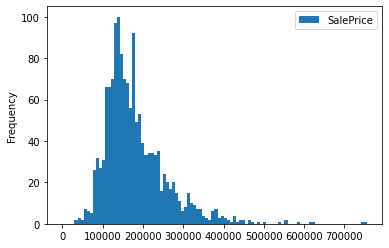

In [4]:
x = df['SalePrice'].sort_values()
print(f'Range of values {x.values[0]} - {x.values[-1]} and has {len(x.unique())} unique values')
df.plot.hist(column=['SalePrice'], bins=100)


First method of creating Decision Tree - Scaling train data from standardized featurewiz result

Empty values

In [5]:
empty_values = df.isnull().sum()
empty_values[empty_values > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Extract only correlated columns

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1460, 303)
    Loaded train data. Shape = (1460, 303)
    Some column names had special characters which were removed...
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#################################################

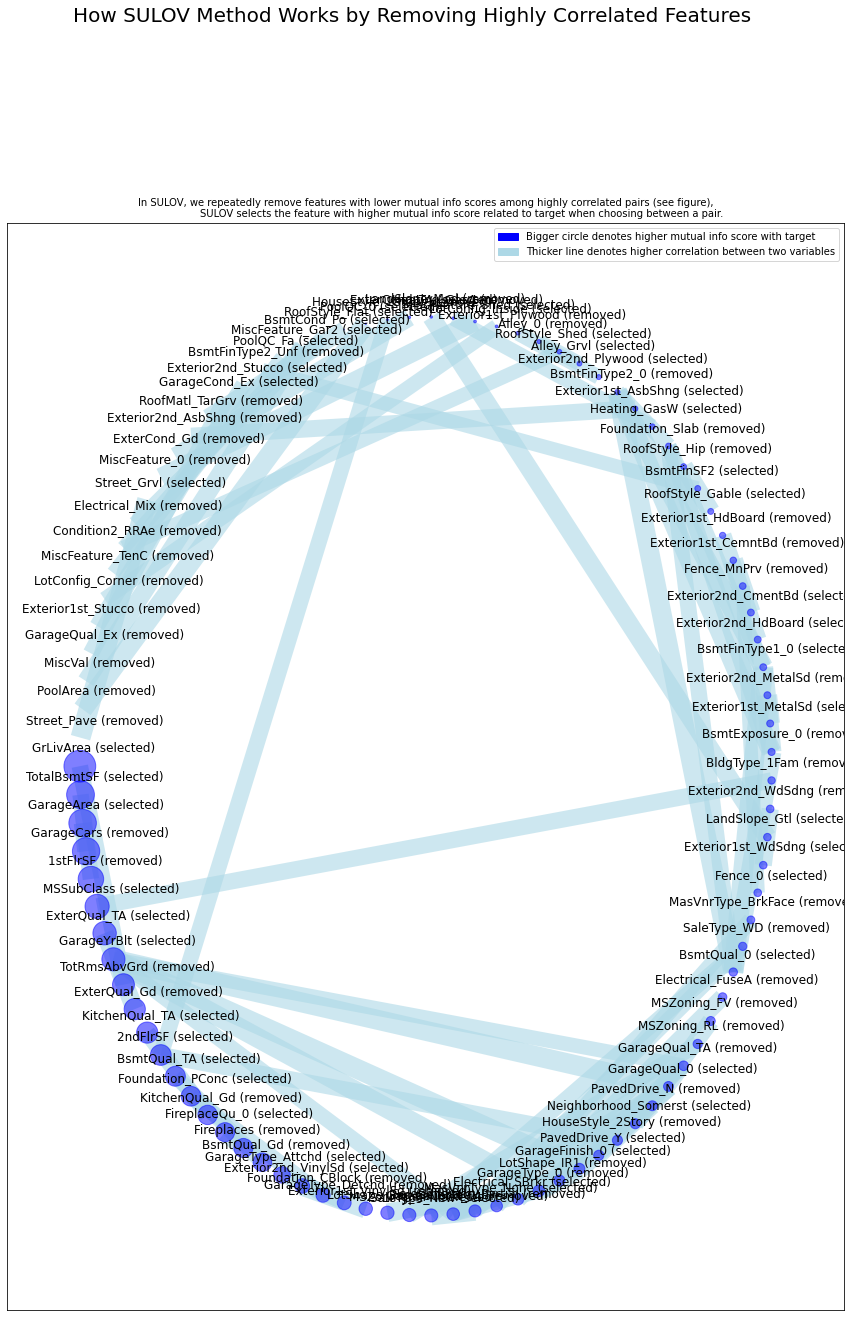

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 250
Final list of selected vars after SULOV = 250
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 250 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 250 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 200 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 150 variables...
            Time taken for regular XGBoost feature sel

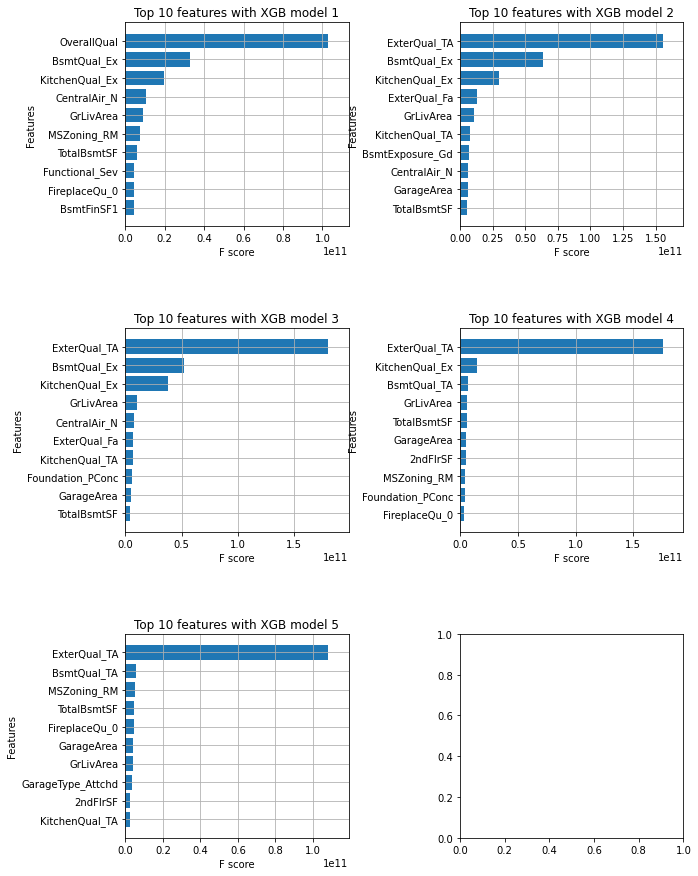

            Total time taken for XGBoost feature selection = 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 106 important features. Too many to print...

    Time taken for feature selection = 3 seconds
Returning 2 dataframes: dataname and test_data with 106 important features.


In [31]:
# df = df.fillna(0)

target = 'SalePrice'
df = pd.get_dummies(df)
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
                            header=0,test_data="", feature_engg="", category_encoders="")

# features
# train
Y = df[target]
# X = df[features]
# X = df.drop('SalePrice', axis=1)
X = train

Split and fit

In [34]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, test_size = 0.33, random_state = 1)

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, Y_train)

# ==== use only for visualisation once - long execution time ====
 
# plt.figure(figsize=(10,8), dpi=1200)
# plot_tree(model, feature_names=newX.columns)
# plt.savefig('foo.png')

DecisionTreeRegressor(random_state=44)

Test Decision Tree

In [35]:
preds = model.predict(X_valid)
# preds 
print(metrics.mean_squared_error(preds, Y_valid, squared=False))

pd.DataFrame(preds, Y_valid)

2947.2828058670134


,0
SalePrice,
231500,232000.0
179500,179400.0
122000,122000.0
84500,84500.0
142000,142125.0
...,...
318000,316600.0
385000,383970.0
253000,252000.0


Second method of creating Decision Tree - labeling data using OneHotEncoder

In [ ]:
Y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

# X_label_values = X.select_dtypes(include='string')

# ohe = OneHotEncoder()
# ohe.fit(X)
# ohe.
# X_train_ohe = ohe.transform(X).toarray()
# X_train_ohe
# ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X.columns))
# ohe_df

# model = DecisionTreeRegressor(random_state=44)
# model.fit(X_train_ohe, Y)

# plt.figure(figsize=(10,8), dpi=150)
# plot_tree(model, feature_names=X.columns);

# vec = DictVectorizer()
# vec.fit_transform(X)
categorical_columns = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'MasVnrArea',  'ExterQual']
a = pd.get_dummies(X, columns=categorical_columns)
a